In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 


In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64 

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [5]:
URLs.CARS

'https://s3.amazonaws.com/fast-ai-imageclas/stanford-cars'

In [6]:
path = untar_data(URLs.CARS); path

PosixPath('/home/thomassw66/.fastai/data/stanford-cars')

In [7]:
path.ls()

[PosixPath('/home/thomassw66/.fastai/data/stanford-cars/cars_test'),
 PosixPath('/home/thomassw66/.fastai/data/stanford-cars/cars_annos.mat'),
 PosixPath('/home/thomassw66/.fastai/data/stanford-cars/cars_train')]

In [8]:
(path/'cars_test').ls()

[PosixPath('/home/thomassw66/.fastai/data/stanford-cars/cars_test/06110.jpg'),
 PosixPath('/home/thomassw66/.fastai/data/stanford-cars/cars_test/01126.jpg'),
 PosixPath('/home/thomassw66/.fastai/data/stanford-cars/cars_test/01846.jpg'),
 PosixPath('/home/thomassw66/.fastai/data/stanford-cars/cars_test/02483.jpg'),
 PosixPath('/home/thomassw66/.fastai/data/stanford-cars/cars_test/01395.jpg'),
 PosixPath('/home/thomassw66/.fastai/data/stanford-cars/cars_test/06445.jpg'),
 PosixPath('/home/thomassw66/.fastai/data/stanford-cars/cars_test/07119.jpg'),
 PosixPath('/home/thomassw66/.fastai/data/stanford-cars/cars_test/00232.jpg'),
 PosixPath('/home/thomassw66/.fastai/data/stanford-cars/cars_test/02534.jpg'),
 PosixPath('/home/thomassw66/.fastai/data/stanford-cars/cars_test/05860.jpg'),
 PosixPath('/home/thomassw66/.fastai/data/stanford-cars/cars_test/06815.jpg'),
 PosixPath('/home/thomassw66/.fastai/data/stanford-cars/cars_test/07249.jpg'),
 PosixPath('/home/thomassw66/.fastai/data/stanford-c

In [9]:
import scipy.io as sio

In [10]:
cars_annos = sio.loadmat(path/'cars_annos.mat')

In [11]:
import pandas as pd 

In [12]:
cars_annos['annotations'][0].dtype

dtype([('relative_im_path', 'O'), ('bbox_x1', 'O'), ('bbox_y1', 'O'), ('bbox_x2', 'O'), ('bbox_y2', 'O'), ('class', 'O'), ('test', 'O')])

In [13]:
cars_annos['annotations'].dtype
annotations = cars_annos['annotations'][0, :]

In [14]:
all_dataset = pd.DataFrame(annotations, columns=['relative_im_path', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_x2', 'class', 'test'])

In [15]:
all_dataset.head(3)

,relative_im_path,bbox_x1,bbox_y1,bbox_x2,bbox_x2,class,test
0,[car_ims/000001.jpg],[[112]],[[7]],[[853]],[[853]],[[1]],[[0]]
1,[car_ims/000002.jpg],[[48]],[[24]],[[441]],[[441]],[[1]],[[0]]
2,[car_ims/000003.jpg],[[7]],[[4]],[[277]],[[277]],[[1]],[[0]]


In [16]:
training_df = all_dataset[all_dataset['test'] == 0]

def filename_for_id(id_num): 
    return "car_ims/0{0}.jpg".format(id_num)

def get_df_for_id(id_num): 
    return training_df[training_df['relative_im_path'] == filename_for_id(id_num)]


In [17]:
testing_df = all_dataset[all_dataset['test'] == 1]
testing_df.head(1)

,relative_im_path,bbox_x1,bbox_y1,bbox_x2,bbox_x2,class,test
45,[car_ims/000046.jpg],[[14]],[[16]],[[268]],[[268]],[[1]],[[1]]


In [18]:
print("Whoopsie! :)")

Whoopsie! :)


In [19]:
training_path = (path/'cars_train')
fnames = training_path.ls()
training

NameError: name 'training' is not defined

In [39]:
fnames = get_image_files(training_path)
str(fnames[1]).split("/")[-1].replace(".jpg","")

def get_labels(file_path): 
    if not isinstance(file_path, str):
        file_path = str(file_path)   
    file_name = file_path.split("/")[-1]
    file_id   = file_name.replace(".jpg","")
    print(file_id)
    data_frame = get_df_for_id(file_id)
    print(data_frame)
    label     = int(data_frame["class"])
    return (file_id, label)

# get_labels(fnames[1])
# get_labels("07119")
len(training_df) == len(fnames)

True

In [40]:
training_df

,relative_im_path,bbox_x1,bbox_y1,bbox_x2,bbox_x2,class,test
0,[car_ims/000001.jpg],[[112]],[[7]],[[853]],[[853]],[[1]],[[0]]
1,[car_ims/000002.jpg],[[48]],[[24]],[[441]],[[441]],[[1]],[[0]]
2,[car_ims/000003.jpg],[[7]],[[4]],[[277]],[[277]],[[1]],[[0]]
3,[car_ims/000004.jpg],[[33]],[[50]],[[197]],[[197]],[[1]],[[0]]
4,[car_ims/000005.jpg],[[5]],[[8]],[[83]],[[83]],[[1]],[[0]]
...,...,...,...,...,...,...,...
16140,[car_ims/016141.jpg],[[42]],[[9]],[[573]],[[573]],[[196]],[[0]]
16141,[car_ims/016142.jpg],[[183]],[[4]],[[1186]],[[1186]],[[196]],[[0]]
16142,[car_ims/016143.jpg],[[121]],[[87]],[[465]],[[465]],[[196]],[[0]]
16143,[car_ims/016144.jpg],[[21]],[[30]],[[468]],[[468]],[[196]],[[0]]


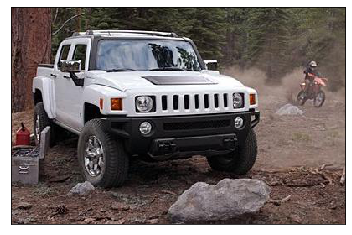

In [41]:
# np.random.seed(2)
# fnames = get_image_files(training_path)
# image_db = ImageDataBunch.from_list(training_path, fnames, ds_tfms=get_transforms(), size=8144, bs=64)

import matplotlib.pyplot as plt 

def show_img(im, figsize=None, ax=None):
    if not ax: fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

img_path = training_path/'08134.jpg'
im = plt.imread(str(img_path))
ax = show_img(im)


In [20]:
cars_annos['class_names'][0][15]

array(['Audi V8 Sedan 1994'], dtype='<U18')

In [21]:
??LabelList

In [22]:
??ImageDataBunch

In [23]:
# ImageDataBunch.from_name_func(training_path, fnames, get_labels
tfms = get_transforms()
tfms


([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do

In [24]:
SEED = 2
np.random.seed(2)

data = ImageDataBunch.from_name_func(training_path, fnames, label_func=lambda x: 1, seed=SEED, ds_tfms=tfms, bs=1).normalize(imagenet_stats)




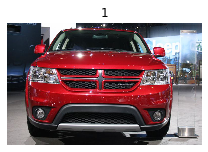

In [25]:
data.show_batch(rows=1, figsize=(3,3))

In [124]:
??ImageItemList

Object `ImageItemList` not found.


In [26]:
from fastai import *

In [27]:
nclasses = len(cars_annos["class_names"][0])
assert nclasses == 196

class_names = dict(zip(range(1, nclasses+1), [c[0] for c in cars_annos["class_names"][0]]))
annos = cars_annos['annotations'][0, :]
dataset = [] 
for i, arr in enumerate(annos):
    dataset.append([arr[0][0]] + [y[0][0] for y in arr][1:7])

temp_df = pd.DataFrame(dataset, columns = ['filename', 'bbox_x1', 'bbox_y2', 'bbox_x2', 'bbox_y2', 'ClassID', 'is_test'])
temp_df = temp_df.assign(ClassName = temp_df.ClassID.map(dict(class_names)))
# temp_df[temp_df["is_test"] == 1].tail(3)
temp_df = temp_df.head(8143)
temp_df.tail(10)


,filename,bbox_x1,bbox_y2,bbox_x2,bbox_y2,ClassID,is_test,ClassName
8133,car_ims/008134.jpg,79,131,275,317,100,0,FIAT 500 Convertible 2012
8134,car_ims/008135.jpg,29,40,418,319,100,0,FIAT 500 Convertible 2012
8135,car_ims/008136.jpg,23,34,405,243,100,0,FIAT 500 Convertible 2012
8136,car_ims/008137.jpg,31,51,568,357,100,0,FIAT 500 Convertible 2012
8137,car_ims/008138.jpg,8,1,590,327,100,0,FIAT 500 Convertible 2012
8138,car_ims/008139.jpg,37,7,351,250,100,0,FIAT 500 Convertible 2012
8139,car_ims/008140.jpg,55,36,426,314,100,0,FIAT 500 Convertible 2012
8140,car_ims/008141.jpg,89,42,868,504,100,0,FIAT 500 Convertible 2012
8141,car_ims/008142.jpg,7,10,385,353,100,0,FIAT 500 Convertible 2012
8142,car_ims/008143.jpg,42,8,465,280,100,0,FIAT 500 Convertible 2012


In [28]:
import os
my_train = path/'cars_train'
my_test = path/'cars_test'
my_train_sub_dirs = [f for f in os.listdir(my_train) if not os.path.isfile(os.path.join(my_train, f))]
my_train_files = [f for f in os.listdir(my_train) if os.path.isfile(os.path.join(my_train, f))]

len(my_train_sub_dirs), len(my_train_files)
my_train_files[-5:]

sorted(my_train.ls())[-5:]
# sorted(my_test.ls())[-5:]

[PosixPath('/home/thomassw66/.fastai/data/stanford-cars/cars_train/08140.jpg'),
 PosixPath('/home/thomassw66/.fastai/data/stanford-cars/cars_train/08141.jpg'),
 PosixPath('/home/thomassw66/.fastai/data/stanford-cars/cars_train/08142.jpg'),
 PosixPath('/home/thomassw66/.fastai/data/stanford-cars/cars_train/08143.jpg'),
 PosixPath('/home/thomassw66/.fastai/data/stanford-cars/cars_train/08144.jpg')]

In [29]:
def make_dataframe(path):
    cars_annos = sio.loadmat(path/'cars_annos.mat')
    
    nclasses = len(cars_annos["class_names"][0])
    assert nclasses == 196
    
    class_names = dict(zip(range(1, nclasses+1), [c[0] for c in cars_annos["class_names"][0]]))
    
    dataset = []
    for i, arr in enumerate(annos):
        dataset.append([arr[0][0]] + [y[0][0] for y in arr][1:7])
    temp_df = pd.DataFrame(dataset, columns = ['filename', 'bbox_x1', 'bbox_y2', 'bbox_x2', 'bbox_y2', 'ClassID', "is_test"])
    temp_df = temp_df.assign(ClassName = temp_df.ClassID.map(dict(class_names)))
    
    

In [205]:
doc(Path)

In [211]:
! wget https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz

--2020-03-06 17:38:37--  https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330960 (323K) [application/x-gzip]
Saving to: ‘car_devkit.tgz’

car_devkit.tgz      100%[===================>] 323.20K  1.78MB/s    in 0.2s    

2020-03-06 17:38:37 (1.78 MB/s) - ‘car_devkit.tgz’ saved [330960/330960]



In [212]:
!tar xvf car_devkit.tgz

devkit/
devkit/cars_meta.mat
devkit/cars_train_annos.mat
devkit/cars_test_annos.mat
devkit/README.txt
devkit/train_perfect_preds.txt
devkit/eval_train.m


In [213]:
!ls devkit

cars_meta.mat	     cars_train_annos.mat  README.txt
cars_test_annos.mat  eval_train.m	   train_perfect_preds.txt


In [214]:
!pwd

/home/thomassw66


In [216]:
!wget http://imagenet.stanford.edu/internal/car196/cars_train.tgz

--2020-03-06 17:41:07--  http://imagenet.stanford.edu/internal/car196/cars_train.tgz
Resolving imagenet.stanford.edu (imagenet.stanford.edu)... 171.64.68.16
Connecting to imagenet.stanford.edu (imagenet.stanford.edu)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 979269282 (934M) [application/x-gzip]
Saving to: ‘cars_train.tgz’

cars_train.tgz      100%[===================>] 933.90M  85.3MB/s    in 11s     

2020-03-06 17:41:18 (86.1 MB/s) - ‘cars_train.tgz’ saved [979269282/979269282]



In [217]:
!tar xvf cars_train.tgz


cars_train/
cars_train/00001.jpg
cars_train/00002.jpg
cars_train/00003.jpg
cars_train/00004.jpg
cars_train/00005.jpg
cars_train/00006.jpg
cars_train/00007.jpg
cars_train/00008.jpg
cars_train/00009.jpg
cars_train/00010.jpg
cars_train/00011.jpg
cars_train/00012.jpg
cars_train/00013.jpg
cars_train/00014.jpg
cars_train/00015.jpg
cars_train/00016.jpg
cars_train/00017.jpg
cars_train/00018.jpg
cars_train/00019.jpg
cars_train/00020.jpg
cars_train/00021.jpg
cars_train/00022.jpg
cars_train/00023.jpg
cars_train/00024.jpg
cars_train/00025.jpg
cars_train/00026.jpg
cars_train/00027.jpg
cars_train/00028.jpg
cars_train/00029.jpg
cars_train/00030.jpg
cars_train/00031.jpg
cars_train/00032.jpg
cars_train/00033.jpg
cars_train/00034.jpg
cars_train/00035.jpg
cars_train/00036.jpg
cars_train/00037.jpg
cars_train/00038.jpg
cars_train/00039.jpg
cars_train/00040.jpg
cars_train/00041.jpg
cars_train/00042.jpg
cars_train/00043.jpg
cars_train/00044.jpg
cars_train/00045.jpg
cars_train/00046.jpg
cars_train/00047.jpg
c

cars_train/00394.jpg
cars_train/00395.jpg
cars_train/00396.jpg
cars_train/00397.jpg
cars_train/00398.jpg
cars_train/00399.jpg
cars_train/00400.jpg
cars_train/00401.jpg
cars_train/00402.jpg
cars_train/00403.jpg
cars_train/00404.jpg
cars_train/00405.jpg
cars_train/00406.jpg
cars_train/00407.jpg
cars_train/00408.jpg
cars_train/00409.jpg
cars_train/00410.jpg
cars_train/00411.jpg
cars_train/00412.jpg
cars_train/00413.jpg
cars_train/00414.jpg
cars_train/00415.jpg
cars_train/00416.jpg
cars_train/00417.jpg
cars_train/00418.jpg
cars_train/00419.jpg
cars_train/00420.jpg
cars_train/00421.jpg
cars_train/00422.jpg
cars_train/00423.jpg
cars_train/00424.jpg
cars_train/00425.jpg
cars_train/00426.jpg
cars_train/00427.jpg
cars_train/00428.jpg
cars_train/00429.jpg
cars_train/00430.jpg
cars_train/00431.jpg
cars_train/00432.jpg
cars_train/00433.jpg
cars_train/00434.jpg
cars_train/00435.jpg
cars_train/00436.jpg
cars_train/00437.jpg
cars_train/00438.jpg
cars_train/00439.jpg
cars_train/00440.jpg
cars_train/00

cars_train/00864.jpg
cars_train/00865.jpg
cars_train/00866.jpg
cars_train/00867.jpg
cars_train/00868.jpg
cars_train/00869.jpg
cars_train/00870.jpg
cars_train/00871.jpg
cars_train/00872.jpg
cars_train/00873.jpg
cars_train/00874.jpg
cars_train/00875.jpg
cars_train/00876.jpg
cars_train/00877.jpg
cars_train/00878.jpg
cars_train/00879.jpg
cars_train/00880.jpg
cars_train/00881.jpg
cars_train/00882.jpg
cars_train/00883.jpg
cars_train/00884.jpg
cars_train/00885.jpg
cars_train/00886.jpg
cars_train/00887.jpg
cars_train/00888.jpg
cars_train/00889.jpg
cars_train/00890.jpg
cars_train/00891.jpg
cars_train/00892.jpg
cars_train/00893.jpg
cars_train/00894.jpg
cars_train/00895.jpg
cars_train/00896.jpg
cars_train/00897.jpg
cars_train/00898.jpg
cars_train/00899.jpg
cars_train/00900.jpg
cars_train/00901.jpg
cars_train/00902.jpg
cars_train/00903.jpg
cars_train/00904.jpg
cars_train/00905.jpg
cars_train/00906.jpg
cars_train/00907.jpg
cars_train/00908.jpg
cars_train/00909.jpg
cars_train/00910.jpg
cars_train/00

cars_train/01285.jpg
cars_train/01286.jpg
cars_train/01287.jpg
cars_train/01288.jpg
cars_train/01289.jpg
cars_train/01290.jpg
cars_train/01291.jpg
cars_train/01292.jpg
cars_train/01293.jpg
cars_train/01294.jpg
cars_train/01295.jpg
cars_train/01296.jpg
cars_train/01297.jpg
cars_train/01298.jpg
cars_train/01299.jpg
cars_train/01300.jpg
cars_train/01301.jpg
cars_train/01302.jpg
cars_train/01303.jpg
cars_train/01304.jpg
cars_train/01305.jpg
cars_train/01306.jpg
cars_train/01307.jpg
cars_train/01308.jpg
cars_train/01309.jpg
cars_train/01310.jpg
cars_train/01311.jpg
cars_train/01312.jpg
cars_train/01313.jpg
cars_train/01314.jpg
cars_train/01315.jpg
cars_train/01316.jpg
cars_train/01317.jpg
cars_train/01318.jpg
cars_train/01319.jpg
cars_train/01320.jpg
cars_train/01321.jpg
cars_train/01322.jpg
cars_train/01323.jpg
cars_train/01324.jpg
cars_train/01325.jpg
cars_train/01326.jpg
cars_train/01327.jpg
cars_train/01328.jpg
cars_train/01329.jpg
cars_train/01330.jpg
cars_train/01331.jpg
cars_train/01

cars_train/01678.jpg
cars_train/01679.jpg
cars_train/01680.jpg
cars_train/01681.jpg
cars_train/01682.jpg
cars_train/01683.jpg
cars_train/01684.jpg
cars_train/01685.jpg
cars_train/01686.jpg
cars_train/01687.jpg
cars_train/01688.jpg
cars_train/01689.jpg
cars_train/01690.jpg
cars_train/01691.jpg
cars_train/01692.jpg
cars_train/01693.jpg
cars_train/01694.jpg
cars_train/01695.jpg
cars_train/01696.jpg
cars_train/01697.jpg
cars_train/01698.jpg
cars_train/01699.jpg
cars_train/01700.jpg
cars_train/01701.jpg
cars_train/01702.jpg
cars_train/01703.jpg
cars_train/01704.jpg
cars_train/01705.jpg
cars_train/01706.jpg
cars_train/01707.jpg
cars_train/01708.jpg
cars_train/01709.jpg
cars_train/01710.jpg
cars_train/01711.jpg
cars_train/01712.jpg
cars_train/01713.jpg
cars_train/01714.jpg
cars_train/01715.jpg
cars_train/01716.jpg
cars_train/01717.jpg
cars_train/01718.jpg
cars_train/01719.jpg
cars_train/01720.jpg
cars_train/01721.jpg
cars_train/01722.jpg
cars_train/01723.jpg
cars_train/01724.jpg
cars_train/01

cars_train/02069.jpg
cars_train/02070.jpg
cars_train/02071.jpg
cars_train/02072.jpg
cars_train/02073.jpg
cars_train/02074.jpg
cars_train/02075.jpg
cars_train/02076.jpg
cars_train/02077.jpg
cars_train/02078.jpg
cars_train/02079.jpg
cars_train/02080.jpg
cars_train/02081.jpg
cars_train/02082.jpg
cars_train/02083.jpg
cars_train/02084.jpg
cars_train/02085.jpg
cars_train/02086.jpg
cars_train/02087.jpg
cars_train/02088.jpg
cars_train/02089.jpg
cars_train/02090.jpg
cars_train/02091.jpg
cars_train/02092.jpg
cars_train/02093.jpg
cars_train/02094.jpg
cars_train/02095.jpg
cars_train/02096.jpg
cars_train/02097.jpg
cars_train/02098.jpg
cars_train/02099.jpg
cars_train/02100.jpg
cars_train/02101.jpg
cars_train/02102.jpg
cars_train/02103.jpg
cars_train/02104.jpg
cars_train/02105.jpg
cars_train/02106.jpg
cars_train/02107.jpg
cars_train/02108.jpg
cars_train/02109.jpg
cars_train/02110.jpg
cars_train/02111.jpg
cars_train/02112.jpg
cars_train/02113.jpg
cars_train/02114.jpg
cars_train/02115.jpg
cars_train/02

cars_train/02480.jpg
cars_train/02481.jpg
cars_train/02482.jpg
cars_train/02483.jpg
cars_train/02484.jpg
cars_train/02485.jpg
cars_train/02486.jpg
cars_train/02487.jpg
cars_train/02488.jpg
cars_train/02489.jpg
cars_train/02490.jpg
cars_train/02491.jpg
cars_train/02492.jpg
cars_train/02493.jpg
cars_train/02494.jpg
cars_train/02495.jpg
cars_train/02496.jpg
cars_train/02497.jpg
cars_train/02498.jpg
cars_train/02499.jpg
cars_train/02500.jpg
cars_train/02501.jpg
cars_train/02502.jpg
cars_train/02503.jpg
cars_train/02504.jpg
cars_train/02505.jpg
cars_train/02506.jpg
cars_train/02507.jpg
cars_train/02508.jpg
cars_train/02509.jpg
cars_train/02510.jpg
cars_train/02511.jpg
cars_train/02512.jpg
cars_train/02513.jpg
cars_train/02514.jpg
cars_train/02515.jpg
cars_train/02516.jpg
cars_train/02517.jpg
cars_train/02518.jpg
cars_train/02519.jpg
cars_train/02520.jpg
cars_train/02521.jpg
cars_train/02522.jpg
cars_train/02523.jpg
cars_train/02524.jpg
cars_train/02525.jpg
cars_train/02526.jpg
cars_train/02

cars_train/02912.jpg
cars_train/02913.jpg
cars_train/02914.jpg
cars_train/02915.jpg
cars_train/02916.jpg
cars_train/02917.jpg
cars_train/02918.jpg
cars_train/02919.jpg
cars_train/02920.jpg
cars_train/02921.jpg
cars_train/02922.jpg
cars_train/02923.jpg
cars_train/02924.jpg
cars_train/02925.jpg
cars_train/02926.jpg
cars_train/02927.jpg
cars_train/02928.jpg
cars_train/02929.jpg
cars_train/02930.jpg
cars_train/02931.jpg
cars_train/02932.jpg
cars_train/02933.jpg
cars_train/02934.jpg
cars_train/02935.jpg
cars_train/02936.jpg
cars_train/02937.jpg
cars_train/02938.jpg
cars_train/02939.jpg
cars_train/02940.jpg
cars_train/02941.jpg
cars_train/02942.jpg
cars_train/02943.jpg
cars_train/02944.jpg
cars_train/02945.jpg
cars_train/02946.jpg
cars_train/02947.jpg
cars_train/02948.jpg
cars_train/02949.jpg
cars_train/02950.jpg
cars_train/02951.jpg
cars_train/02952.jpg
cars_train/02953.jpg
cars_train/02954.jpg
cars_train/02955.jpg
cars_train/02956.jpg
cars_train/02957.jpg
cars_train/02958.jpg
cars_train/02

cars_train/03347.jpg
cars_train/03348.jpg
cars_train/03349.jpg
cars_train/03350.jpg
cars_train/03351.jpg
cars_train/03352.jpg
cars_train/03353.jpg
cars_train/03354.jpg
cars_train/03355.jpg
cars_train/03356.jpg
cars_train/03357.jpg
cars_train/03358.jpg
cars_train/03359.jpg
cars_train/03360.jpg
cars_train/03361.jpg
cars_train/03362.jpg
cars_train/03363.jpg
cars_train/03364.jpg
cars_train/03365.jpg
cars_train/03366.jpg
cars_train/03367.jpg
cars_train/03368.jpg
cars_train/03369.jpg
cars_train/03370.jpg
cars_train/03371.jpg
cars_train/03372.jpg
cars_train/03373.jpg
cars_train/03374.jpg
cars_train/03375.jpg
cars_train/03376.jpg
cars_train/03377.jpg
cars_train/03378.jpg
cars_train/03379.jpg
cars_train/03380.jpg
cars_train/03381.jpg
cars_train/03382.jpg
cars_train/03383.jpg
cars_train/03384.jpg
cars_train/03385.jpg
cars_train/03386.jpg
cars_train/03387.jpg
cars_train/03388.jpg
cars_train/03389.jpg
cars_train/03390.jpg
cars_train/03391.jpg
cars_train/03392.jpg
cars_train/03393.jpg
cars_train/03

cars_train/03751.jpg
cars_train/03752.jpg
cars_train/03753.jpg
cars_train/03754.jpg
cars_train/03755.jpg
cars_train/03756.jpg
cars_train/03757.jpg
cars_train/03758.jpg
cars_train/03759.jpg
cars_train/03760.jpg
cars_train/03761.jpg
cars_train/03762.jpg
cars_train/03763.jpg
cars_train/03764.jpg
cars_train/03765.jpg
cars_train/03766.jpg
cars_train/03767.jpg
cars_train/03768.jpg
cars_train/03769.jpg
cars_train/03770.jpg
cars_train/03771.jpg
cars_train/03772.jpg
cars_train/03773.jpg
cars_train/03774.jpg
cars_train/03775.jpg
cars_train/03776.jpg
cars_train/03777.jpg
cars_train/03778.jpg
cars_train/03779.jpg
cars_train/03780.jpg
cars_train/03781.jpg
cars_train/03782.jpg
cars_train/03783.jpg
cars_train/03784.jpg
cars_train/03785.jpg
cars_train/03786.jpg
cars_train/03787.jpg
cars_train/03788.jpg
cars_train/03789.jpg
cars_train/03790.jpg
cars_train/03791.jpg
cars_train/03792.jpg
cars_train/03793.jpg
cars_train/03794.jpg
cars_train/03795.jpg
cars_train/03796.jpg
cars_train/03797.jpg
cars_train/03

cars_train/04174.jpg
cars_train/04175.jpg
cars_train/04176.jpg
cars_train/04177.jpg
cars_train/04178.jpg
cars_train/04179.jpg
cars_train/04180.jpg
cars_train/04181.jpg
cars_train/04182.jpg
cars_train/04183.jpg
cars_train/04184.jpg
cars_train/04185.jpg
cars_train/04186.jpg
cars_train/04187.jpg
cars_train/04188.jpg
cars_train/04189.jpg
cars_train/04190.jpg
cars_train/04191.jpg
cars_train/04192.jpg
cars_train/04193.jpg
cars_train/04194.jpg
cars_train/04195.jpg
cars_train/04196.jpg
cars_train/04197.jpg
cars_train/04198.jpg
cars_train/04199.jpg
cars_train/04200.jpg
cars_train/04201.jpg
cars_train/04202.jpg
cars_train/04203.jpg
cars_train/04204.jpg
cars_train/04205.jpg
cars_train/04206.jpg
cars_train/04207.jpg
cars_train/04208.jpg
cars_train/04209.jpg
cars_train/04210.jpg
cars_train/04211.jpg
cars_train/04212.jpg
cars_train/04213.jpg
cars_train/04214.jpg
cars_train/04215.jpg
cars_train/04216.jpg
cars_train/04217.jpg
cars_train/04218.jpg
cars_train/04219.jpg
cars_train/04220.jpg
cars_train/04

cars_train/04574.jpg
cars_train/04575.jpg
cars_train/04576.jpg
cars_train/04577.jpg
cars_train/04578.jpg
cars_train/04579.jpg
cars_train/04580.jpg
cars_train/04581.jpg
cars_train/04582.jpg
cars_train/04583.jpg
cars_train/04584.jpg
cars_train/04585.jpg
cars_train/04586.jpg
cars_train/04587.jpg
cars_train/04588.jpg
cars_train/04589.jpg
cars_train/04590.jpg
cars_train/04591.jpg
cars_train/04592.jpg
cars_train/04593.jpg
cars_train/04594.jpg
cars_train/04595.jpg
cars_train/04596.jpg
cars_train/04597.jpg
cars_train/04598.jpg
cars_train/04599.jpg
cars_train/04600.jpg
cars_train/04601.jpg
cars_train/04602.jpg
cars_train/04603.jpg
cars_train/04604.jpg
cars_train/04605.jpg
cars_train/04606.jpg
cars_train/04607.jpg
cars_train/04608.jpg
cars_train/04609.jpg
cars_train/04610.jpg
cars_train/04611.jpg
cars_train/04612.jpg
cars_train/04613.jpg
cars_train/04614.jpg
cars_train/04615.jpg
cars_train/04616.jpg
cars_train/04617.jpg
cars_train/04618.jpg
cars_train/04619.jpg
cars_train/04620.jpg
cars_train/04

cars_train/04985.jpg
cars_train/04986.jpg
cars_train/04987.jpg
cars_train/04988.jpg
cars_train/04989.jpg
cars_train/04990.jpg
cars_train/04991.jpg
cars_train/04992.jpg
cars_train/04993.jpg
cars_train/04994.jpg
cars_train/04995.jpg
cars_train/04996.jpg
cars_train/04997.jpg
cars_train/04998.jpg
cars_train/04999.jpg
cars_train/05000.jpg
cars_train/05001.jpg
cars_train/05002.jpg
cars_train/05003.jpg
cars_train/05004.jpg
cars_train/05005.jpg
cars_train/05006.jpg
cars_train/05007.jpg
cars_train/05008.jpg
cars_train/05009.jpg
cars_train/05010.jpg
cars_train/05011.jpg
cars_train/05012.jpg
cars_train/05013.jpg
cars_train/05014.jpg
cars_train/05015.jpg
cars_train/05016.jpg
cars_train/05017.jpg
cars_train/05018.jpg
cars_train/05019.jpg
cars_train/05020.jpg
cars_train/05021.jpg
cars_train/05022.jpg
cars_train/05023.jpg
cars_train/05024.jpg
cars_train/05025.jpg
cars_train/05026.jpg
cars_train/05027.jpg
cars_train/05028.jpg
cars_train/05029.jpg
cars_train/05030.jpg
cars_train/05031.jpg
cars_train/05

cars_train/05411.jpg
cars_train/05412.jpg
cars_train/05413.jpg
cars_train/05414.jpg
cars_train/05415.jpg
cars_train/05416.jpg
cars_train/05417.jpg
cars_train/05418.jpg
cars_train/05419.jpg
cars_train/05420.jpg
cars_train/05421.jpg
cars_train/05422.jpg
cars_train/05423.jpg
cars_train/05424.jpg
cars_train/05425.jpg
cars_train/05426.jpg
cars_train/05427.jpg
cars_train/05428.jpg
cars_train/05429.jpg
cars_train/05430.jpg
cars_train/05431.jpg
cars_train/05432.jpg
cars_train/05433.jpg
cars_train/05434.jpg
cars_train/05435.jpg
cars_train/05436.jpg
cars_train/05437.jpg
cars_train/05438.jpg
cars_train/05439.jpg
cars_train/05440.jpg
cars_train/05441.jpg
cars_train/05442.jpg
cars_train/05443.jpg
cars_train/05444.jpg
cars_train/05445.jpg
cars_train/05446.jpg
cars_train/05447.jpg
cars_train/05448.jpg
cars_train/05449.jpg
cars_train/05450.jpg
cars_train/05451.jpg
cars_train/05452.jpg
cars_train/05453.jpg
cars_train/05454.jpg
cars_train/05455.jpg
cars_train/05456.jpg
cars_train/05457.jpg
cars_train/05

cars_train/05851.jpg
cars_train/05852.jpg
cars_train/05853.jpg
cars_train/05854.jpg
cars_train/05855.jpg
cars_train/05856.jpg
cars_train/05857.jpg
cars_train/05858.jpg
cars_train/05859.jpg
cars_train/05860.jpg
cars_train/05861.jpg
cars_train/05862.jpg
cars_train/05863.jpg
cars_train/05864.jpg
cars_train/05865.jpg
cars_train/05866.jpg
cars_train/05867.jpg
cars_train/05868.jpg
cars_train/05869.jpg
cars_train/05870.jpg
cars_train/05871.jpg
cars_train/05872.jpg
cars_train/05873.jpg
cars_train/05874.jpg
cars_train/05875.jpg
cars_train/05876.jpg
cars_train/05877.jpg
cars_train/05878.jpg
cars_train/05879.jpg
cars_train/05880.jpg
cars_train/05881.jpg
cars_train/05882.jpg
cars_train/05883.jpg
cars_train/05884.jpg
cars_train/05885.jpg
cars_train/05886.jpg
cars_train/05887.jpg
cars_train/05888.jpg
cars_train/05889.jpg
cars_train/05890.jpg
cars_train/05891.jpg
cars_train/05892.jpg
cars_train/05893.jpg
cars_train/05894.jpg
cars_train/05895.jpg
cars_train/05896.jpg
cars_train/05897.jpg
cars_train/05

cars_train/06294.jpg
cars_train/06295.jpg
cars_train/06296.jpg
cars_train/06297.jpg
cars_train/06298.jpg
cars_train/06299.jpg
cars_train/06300.jpg
cars_train/06301.jpg
cars_train/06302.jpg
cars_train/06303.jpg
cars_train/06304.jpg
cars_train/06305.jpg
cars_train/06306.jpg
cars_train/06307.jpg
cars_train/06308.jpg
cars_train/06309.jpg
cars_train/06310.jpg
cars_train/06311.jpg
cars_train/06312.jpg
cars_train/06313.jpg
cars_train/06314.jpg
cars_train/06315.jpg
cars_train/06316.jpg
cars_train/06317.jpg
cars_train/06318.jpg
cars_train/06319.jpg
cars_train/06320.jpg
cars_train/06321.jpg
cars_train/06322.jpg
cars_train/06323.jpg
cars_train/06324.jpg
cars_train/06325.jpg
cars_train/06326.jpg
cars_train/06327.jpg
cars_train/06328.jpg
cars_train/06329.jpg
cars_train/06330.jpg
cars_train/06331.jpg
cars_train/06332.jpg
cars_train/06333.jpg
cars_train/06334.jpg
cars_train/06335.jpg
cars_train/06336.jpg
cars_train/06337.jpg
cars_train/06338.jpg
cars_train/06339.jpg
cars_train/06340.jpg
cars_train/06

cars_train/06698.jpg
cars_train/06699.jpg
cars_train/06700.jpg
cars_train/06701.jpg
cars_train/06702.jpg
cars_train/06703.jpg
cars_train/06704.jpg
cars_train/06705.jpg
cars_train/06706.jpg
cars_train/06707.jpg
cars_train/06708.jpg
cars_train/06709.jpg
cars_train/06710.jpg
cars_train/06711.jpg
cars_train/06712.jpg
cars_train/06713.jpg
cars_train/06714.jpg
cars_train/06715.jpg
cars_train/06716.jpg
cars_train/06717.jpg
cars_train/06718.jpg
cars_train/06719.jpg
cars_train/06720.jpg
cars_train/06721.jpg
cars_train/06722.jpg
cars_train/06723.jpg
cars_train/06724.jpg
cars_train/06725.jpg
cars_train/06726.jpg
cars_train/06727.jpg
cars_train/06728.jpg
cars_train/06729.jpg
cars_train/06730.jpg
cars_train/06731.jpg
cars_train/06732.jpg
cars_train/06733.jpg
cars_train/06734.jpg
cars_train/06735.jpg
cars_train/06736.jpg
cars_train/06737.jpg
cars_train/06738.jpg
cars_train/06739.jpg
cars_train/06740.jpg
cars_train/06741.jpg
cars_train/06742.jpg
cars_train/06743.jpg
cars_train/06744.jpg
cars_train/06

cars_train/07110.jpg
cars_train/07111.jpg
cars_train/07112.jpg
cars_train/07113.jpg
cars_train/07114.jpg
cars_train/07115.jpg
cars_train/07116.jpg
cars_train/07117.jpg
cars_train/07118.jpg
cars_train/07119.jpg
cars_train/07120.jpg
cars_train/07121.jpg
cars_train/07122.jpg
cars_train/07123.jpg
cars_train/07124.jpg
cars_train/07125.jpg
cars_train/07126.jpg
cars_train/07127.jpg
cars_train/07128.jpg
cars_train/07129.jpg
cars_train/07130.jpg
cars_train/07131.jpg
cars_train/07132.jpg
cars_train/07133.jpg
cars_train/07134.jpg
cars_train/07135.jpg
cars_train/07136.jpg
cars_train/07137.jpg
cars_train/07138.jpg
cars_train/07139.jpg
cars_train/07140.jpg
cars_train/07141.jpg
cars_train/07142.jpg
cars_train/07143.jpg
cars_train/07144.jpg
cars_train/07145.jpg
cars_train/07146.jpg
cars_train/07147.jpg
cars_train/07148.jpg
cars_train/07149.jpg
cars_train/07150.jpg
cars_train/07151.jpg
cars_train/07152.jpg
cars_train/07153.jpg
cars_train/07154.jpg
cars_train/07155.jpg
cars_train/07156.jpg
cars_train/07

cars_train/07542.jpg
cars_train/07543.jpg
cars_train/07544.jpg
cars_train/07545.jpg
cars_train/07546.jpg
cars_train/07547.jpg
cars_train/07548.jpg
cars_train/07549.jpg
cars_train/07550.jpg
cars_train/07551.jpg
cars_train/07552.jpg
cars_train/07553.jpg
cars_train/07554.jpg
cars_train/07555.jpg
cars_train/07556.jpg
cars_train/07557.jpg
cars_train/07558.jpg
cars_train/07559.jpg
cars_train/07560.jpg
cars_train/07561.jpg
cars_train/07562.jpg
cars_train/07563.jpg
cars_train/07564.jpg
cars_train/07565.jpg
cars_train/07566.jpg
cars_train/07567.jpg
cars_train/07568.jpg
cars_train/07569.jpg
cars_train/07570.jpg
cars_train/07571.jpg
cars_train/07572.jpg
cars_train/07573.jpg
cars_train/07574.jpg
cars_train/07575.jpg
cars_train/07576.jpg
cars_train/07577.jpg
cars_train/07578.jpg
cars_train/07579.jpg
cars_train/07580.jpg
cars_train/07581.jpg
cars_train/07582.jpg
cars_train/07583.jpg
cars_train/07584.jpg
cars_train/07585.jpg
cars_train/07586.jpg
cars_train/07587.jpg
cars_train/07588.jpg
cars_train/07

cars_train/07958.jpg
cars_train/07959.jpg
cars_train/07960.jpg
cars_train/07961.jpg
cars_train/07962.jpg
cars_train/07963.jpg
cars_train/07964.jpg
cars_train/07965.jpg
cars_train/07966.jpg
cars_train/07967.jpg
cars_train/07968.jpg
cars_train/07969.jpg
cars_train/07970.jpg
cars_train/07971.jpg
cars_train/07972.jpg
cars_train/07973.jpg
cars_train/07974.jpg
cars_train/07975.jpg
cars_train/07976.jpg
cars_train/07977.jpg
cars_train/07978.jpg
cars_train/07979.jpg
cars_train/07980.jpg
cars_train/07981.jpg
cars_train/07982.jpg
cars_train/07983.jpg
cars_train/07984.jpg
cars_train/07985.jpg
cars_train/07986.jpg
cars_train/07987.jpg
cars_train/07988.jpg
cars_train/07989.jpg
cars_train/07990.jpg
cars_train/07991.jpg
cars_train/07992.jpg
cars_train/07993.jpg
cars_train/07994.jpg
cars_train/07995.jpg
cars_train/07996.jpg
cars_train/07997.jpg
cars_train/07998.jpg
cars_train/07999.jpg
cars_train/08000.jpg
cars_train/08001.jpg
cars_train/08002.jpg
cars_train/08003.jpg
cars_train/08004.jpg
cars_train/08

In [32]:
home_directory = Path("/home/thomassw66")
home_directory.ls()

[PosixPath('/home/thomassw66/.bash_logout'),
 PosixPath('/home/thomassw66/.profile'),
 PosixPath('/home/thomassw66/.bashrc'),
 PosixPath('/home/thomassw66/.nv'),
 PosixPath('/home/thomassw66/.conda'),
 PosixPath('/home/thomassw66/.ssh'),
 PosixPath('/home/thomassw66/.ipython'),
 PosixPath('/home/thomassw66/.local'),
 PosixPath('/home/thomassw66/devkit'),
 PosixPath('/home/thomassw66/.cache'),
 PosixPath('/home/thomassw66/cars_train'),
 PosixPath('/home/thomassw66/fastai_lesson1.ipynb'),
 PosixPath('/home/thomassw66/.bash_history'),
 PosixPath('/home/thomassw66/.viminfo'),
 PosixPath('/home/thomassw66/CARS .ipynb'),
 PosixPath('/home/thomassw66/.ipynb_checkpoints'),
 PosixPath('/home/thomassw66/.docker'),
 PosixPath('/home/thomassw66/.fastai'),
 PosixPath('/home/thomassw66/stanford-cars-v2'),
 PosixPath('/home/thomassw66/.jupyter'),
 PosixPath('/home/thomassw66/.config')]

In [224]:
!mkdir stanford-cars-v2

In [225]:
!mv cars_train.tgz stanford-cars-v2/
!mv car_devkit.tgz stanford-cars-v2/

In [226]:
!cd stanford-cars-v2


In [227]:
!tar xvf cars_train.tgz

tar: cars_train.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [229]:
!pwd

/home/thomassw66


In [231]:
!tar xvf stanford-cars-v2/car_devkit.tgz --directory stanford-cars-v2/

devkit/
devkit/cars_meta.mat
devkit/cars_train_annos.mat
devkit/cars_test_annos.mat
devkit/README.txt
devkit/train_perfect_preds.txt
devkit/eval_train.m


In [234]:
!ls stanford-cars-v2/devkit/

cars_meta.mat	     cars_train_annos.mat  README.txt
cars_test_annos.mat  eval_train.m	   train_perfect_preds.txt


In [236]:
!tar xvf stanford-cars-v2/cars_train.tgz --directory stanford-cars-v2/
    

cars_train/
cars_train/00001.jpg
cars_train/00002.jpg
cars_train/00003.jpg
cars_train/00004.jpg
cars_train/00005.jpg
cars_train/00006.jpg
cars_train/00007.jpg
cars_train/00008.jpg
cars_train/00009.jpg
cars_train/00010.jpg
cars_train/00011.jpg
cars_train/00012.jpg
cars_train/00013.jpg
cars_train/00014.jpg
cars_train/00015.jpg
cars_train/00016.jpg
cars_train/00017.jpg
cars_train/00018.jpg
cars_train/00019.jpg
cars_train/00020.jpg
cars_train/00021.jpg
cars_train/00022.jpg
cars_train/00023.jpg
cars_train/00024.jpg
cars_train/00025.jpg
cars_train/00026.jpg
cars_train/00027.jpg
cars_train/00028.jpg
cars_train/00029.jpg
cars_train/00030.jpg
cars_train/00031.jpg
cars_train/00032.jpg
cars_train/00033.jpg
cars_train/00034.jpg
cars_train/00035.jpg
cars_train/00036.jpg
cars_train/00037.jpg
cars_train/00038.jpg
cars_train/00039.jpg
cars_train/00040.jpg
cars_train/00041.jpg
cars_train/00042.jpg
cars_train/00043.jpg
cars_train/00044.jpg
cars_train/00045.jpg
cars_train/00046.jpg
cars_train/00047.jpg
c

cars_train/00404.jpg
cars_train/00405.jpg
cars_train/00406.jpg
cars_train/00407.jpg
cars_train/00408.jpg
cars_train/00409.jpg
cars_train/00410.jpg
cars_train/00411.jpg
cars_train/00412.jpg
cars_train/00413.jpg
cars_train/00414.jpg
cars_train/00415.jpg
cars_train/00416.jpg
cars_train/00417.jpg
cars_train/00418.jpg
cars_train/00419.jpg
cars_train/00420.jpg
cars_train/00421.jpg
cars_train/00422.jpg
cars_train/00423.jpg
cars_train/00424.jpg
cars_train/00425.jpg
cars_train/00426.jpg
cars_train/00427.jpg
cars_train/00428.jpg
cars_train/00429.jpg
cars_train/00430.jpg
cars_train/00431.jpg
cars_train/00432.jpg
cars_train/00433.jpg
cars_train/00434.jpg
cars_train/00435.jpg
cars_train/00436.jpg
cars_train/00437.jpg
cars_train/00438.jpg
cars_train/00439.jpg
cars_train/00440.jpg
cars_train/00441.jpg
cars_train/00442.jpg
cars_train/00443.jpg
cars_train/00444.jpg
cars_train/00445.jpg
cars_train/00446.jpg
cars_train/00447.jpg
cars_train/00448.jpg
cars_train/00449.jpg
cars_train/00450.jpg
cars_train/00

cars_train/00812.jpg
cars_train/00813.jpg
cars_train/00814.jpg
cars_train/00815.jpg
cars_train/00816.jpg
cars_train/00817.jpg
cars_train/00818.jpg
cars_train/00819.jpg
cars_train/00820.jpg
cars_train/00821.jpg
cars_train/00822.jpg
cars_train/00823.jpg
cars_train/00824.jpg
cars_train/00825.jpg
cars_train/00826.jpg
cars_train/00827.jpg
cars_train/00828.jpg
cars_train/00829.jpg
cars_train/00830.jpg
cars_train/00831.jpg
cars_train/00832.jpg
cars_train/00833.jpg
cars_train/00834.jpg
cars_train/00835.jpg
cars_train/00836.jpg
cars_train/00837.jpg
cars_train/00838.jpg
cars_train/00839.jpg
cars_train/00840.jpg
cars_train/00841.jpg
cars_train/00842.jpg
cars_train/00843.jpg
cars_train/00844.jpg
cars_train/00845.jpg
cars_train/00846.jpg
cars_train/00847.jpg
cars_train/00848.jpg
cars_train/00849.jpg
cars_train/00850.jpg
cars_train/00851.jpg
cars_train/00852.jpg
cars_train/00853.jpg
cars_train/00854.jpg
cars_train/00855.jpg
cars_train/00856.jpg
cars_train/00857.jpg
cars_train/00858.jpg
cars_train/00

cars_train/01253.jpg
cars_train/01254.jpg
cars_train/01255.jpg
cars_train/01256.jpg
cars_train/01257.jpg
cars_train/01258.jpg
cars_train/01259.jpg
cars_train/01260.jpg
cars_train/01261.jpg
cars_train/01262.jpg
cars_train/01263.jpg
cars_train/01264.jpg
cars_train/01265.jpg
cars_train/01266.jpg
cars_train/01267.jpg
cars_train/01268.jpg
cars_train/01269.jpg
cars_train/01270.jpg
cars_train/01271.jpg
cars_train/01272.jpg
cars_train/01273.jpg
cars_train/01274.jpg
cars_train/01275.jpg
cars_train/01276.jpg
cars_train/01277.jpg
cars_train/01278.jpg
cars_train/01279.jpg
cars_train/01280.jpg
cars_train/01281.jpg
cars_train/01282.jpg
cars_train/01283.jpg
cars_train/01284.jpg
cars_train/01285.jpg
cars_train/01286.jpg
cars_train/01287.jpg
cars_train/01288.jpg
cars_train/01289.jpg
cars_train/01290.jpg
cars_train/01291.jpg
cars_train/01292.jpg
cars_train/01293.jpg
cars_train/01294.jpg
cars_train/01295.jpg
cars_train/01296.jpg
cars_train/01297.jpg
cars_train/01298.jpg
cars_train/01299.jpg
cars_train/01

cars_train/01658.jpg
cars_train/01659.jpg
cars_train/01660.jpg
cars_train/01661.jpg
cars_train/01662.jpg
cars_train/01663.jpg
cars_train/01664.jpg
cars_train/01665.jpg
cars_train/01666.jpg
cars_train/01667.jpg
cars_train/01668.jpg
cars_train/01669.jpg
cars_train/01670.jpg
cars_train/01671.jpg
cars_train/01672.jpg
cars_train/01673.jpg
cars_train/01674.jpg
cars_train/01675.jpg
cars_train/01676.jpg
cars_train/01677.jpg
cars_train/01678.jpg
cars_train/01679.jpg
cars_train/01680.jpg
cars_train/01681.jpg
cars_train/01682.jpg
cars_train/01683.jpg
cars_train/01684.jpg
cars_train/01685.jpg
cars_train/01686.jpg
cars_train/01687.jpg
cars_train/01688.jpg
cars_train/01689.jpg
cars_train/01690.jpg
cars_train/01691.jpg
cars_train/01692.jpg
cars_train/01693.jpg
cars_train/01694.jpg
cars_train/01695.jpg
cars_train/01696.jpg
cars_train/01697.jpg
cars_train/01698.jpg
cars_train/01699.jpg
cars_train/01700.jpg
cars_train/01701.jpg
cars_train/01702.jpg
cars_train/01703.jpg
cars_train/01704.jpg
cars_train/01

cars_train/02070.jpg
cars_train/02071.jpg
cars_train/02072.jpg
cars_train/02073.jpg
cars_train/02074.jpg
cars_train/02075.jpg
cars_train/02076.jpg
cars_train/02077.jpg
cars_train/02078.jpg
cars_train/02079.jpg
cars_train/02080.jpg
cars_train/02081.jpg
cars_train/02082.jpg
cars_train/02083.jpg
cars_train/02084.jpg
cars_train/02085.jpg
cars_train/02086.jpg
cars_train/02087.jpg
cars_train/02088.jpg
cars_train/02089.jpg
cars_train/02090.jpg
cars_train/02091.jpg
cars_train/02092.jpg
cars_train/02093.jpg
cars_train/02094.jpg
cars_train/02095.jpg
cars_train/02096.jpg
cars_train/02097.jpg
cars_train/02098.jpg
cars_train/02099.jpg
cars_train/02100.jpg
cars_train/02101.jpg
cars_train/02102.jpg
cars_train/02103.jpg
cars_train/02104.jpg
cars_train/02105.jpg
cars_train/02106.jpg
cars_train/02107.jpg
cars_train/02108.jpg
cars_train/02109.jpg
cars_train/02110.jpg
cars_train/02111.jpg
cars_train/02112.jpg
cars_train/02113.jpg
cars_train/02114.jpg
cars_train/02115.jpg
cars_train/02116.jpg
cars_train/02

cars_train/02471.jpg
cars_train/02472.jpg
cars_train/02473.jpg
cars_train/02474.jpg
cars_train/02475.jpg
cars_train/02476.jpg
cars_train/02477.jpg
cars_train/02478.jpg
cars_train/02479.jpg
cars_train/02480.jpg
cars_train/02481.jpg
cars_train/02482.jpg
cars_train/02483.jpg
cars_train/02484.jpg
cars_train/02485.jpg
cars_train/02486.jpg
cars_train/02487.jpg
cars_train/02488.jpg
cars_train/02489.jpg
cars_train/02490.jpg
cars_train/02491.jpg
cars_train/02492.jpg
cars_train/02493.jpg
cars_train/02494.jpg
cars_train/02495.jpg
cars_train/02496.jpg
cars_train/02497.jpg
cars_train/02498.jpg
cars_train/02499.jpg
cars_train/02500.jpg
cars_train/02501.jpg
cars_train/02502.jpg
cars_train/02503.jpg
cars_train/02504.jpg
cars_train/02505.jpg
cars_train/02506.jpg
cars_train/02507.jpg
cars_train/02508.jpg
cars_train/02509.jpg
cars_train/02510.jpg
cars_train/02511.jpg
cars_train/02512.jpg
cars_train/02513.jpg
cars_train/02514.jpg
cars_train/02515.jpg
cars_train/02516.jpg
cars_train/02517.jpg
cars_train/02

cars_train/02890.jpg
cars_train/02891.jpg
cars_train/02892.jpg
cars_train/02893.jpg
cars_train/02894.jpg
cars_train/02895.jpg
cars_train/02896.jpg
cars_train/02897.jpg
cars_train/02898.jpg
cars_train/02899.jpg
cars_train/02900.jpg
cars_train/02901.jpg
cars_train/02902.jpg
cars_train/02903.jpg
cars_train/02904.jpg
cars_train/02905.jpg
cars_train/02906.jpg
cars_train/02907.jpg
cars_train/02908.jpg
cars_train/02909.jpg
cars_train/02910.jpg
cars_train/02911.jpg
cars_train/02912.jpg
cars_train/02913.jpg
cars_train/02914.jpg
cars_train/02915.jpg
cars_train/02916.jpg
cars_train/02917.jpg
cars_train/02918.jpg
cars_train/02919.jpg
cars_train/02920.jpg
cars_train/02921.jpg
cars_train/02922.jpg
cars_train/02923.jpg
cars_train/02924.jpg
cars_train/02925.jpg
cars_train/02926.jpg
cars_train/02927.jpg
cars_train/02928.jpg
cars_train/02929.jpg
cars_train/02930.jpg
cars_train/02931.jpg
cars_train/02932.jpg
cars_train/02933.jpg
cars_train/02934.jpg
cars_train/02935.jpg
cars_train/02936.jpg
cars_train/02

cars_train/03347.jpg
cars_train/03348.jpg
cars_train/03349.jpg
cars_train/03350.jpg
cars_train/03351.jpg
cars_train/03352.jpg
cars_train/03353.jpg
cars_train/03354.jpg
cars_train/03355.jpg
cars_train/03356.jpg
cars_train/03357.jpg
cars_train/03358.jpg
cars_train/03359.jpg
cars_train/03360.jpg
cars_train/03361.jpg
cars_train/03362.jpg
cars_train/03363.jpg
cars_train/03364.jpg
cars_train/03365.jpg
cars_train/03366.jpg
cars_train/03367.jpg
cars_train/03368.jpg
cars_train/03369.jpg
cars_train/03370.jpg
cars_train/03371.jpg
cars_train/03372.jpg
cars_train/03373.jpg
cars_train/03374.jpg
cars_train/03375.jpg
cars_train/03376.jpg
cars_train/03377.jpg
cars_train/03378.jpg
cars_train/03379.jpg
cars_train/03380.jpg
cars_train/03381.jpg
cars_train/03382.jpg
cars_train/03383.jpg
cars_train/03384.jpg
cars_train/03385.jpg
cars_train/03386.jpg
cars_train/03387.jpg
cars_train/03388.jpg
cars_train/03389.jpg
cars_train/03390.jpg
cars_train/03391.jpg
cars_train/03392.jpg
cars_train/03393.jpg
cars_train/03

cars_train/03751.jpg
cars_train/03752.jpg
cars_train/03753.jpg
cars_train/03754.jpg
cars_train/03755.jpg
cars_train/03756.jpg
cars_train/03757.jpg
cars_train/03758.jpg
cars_train/03759.jpg
cars_train/03760.jpg
cars_train/03761.jpg
cars_train/03762.jpg
cars_train/03763.jpg
cars_train/03764.jpg
cars_train/03765.jpg
cars_train/03766.jpg
cars_train/03767.jpg
cars_train/03768.jpg
cars_train/03769.jpg
cars_train/03770.jpg
cars_train/03771.jpg
cars_train/03772.jpg
cars_train/03773.jpg
cars_train/03774.jpg
cars_train/03775.jpg
cars_train/03776.jpg
cars_train/03777.jpg
cars_train/03778.jpg
cars_train/03779.jpg
cars_train/03780.jpg
cars_train/03781.jpg
cars_train/03782.jpg
cars_train/03783.jpg
cars_train/03784.jpg
cars_train/03785.jpg
cars_train/03786.jpg
cars_train/03787.jpg
cars_train/03788.jpg
cars_train/03789.jpg
cars_train/03790.jpg
cars_train/03791.jpg
cars_train/03792.jpg
cars_train/03793.jpg
cars_train/03794.jpg
cars_train/03795.jpg
cars_train/03796.jpg
cars_train/03797.jpg
cars_train/03

cars_train/04173.jpg
cars_train/04174.jpg
cars_train/04175.jpg
cars_train/04176.jpg
cars_train/04177.jpg
cars_train/04178.jpg
cars_train/04179.jpg
cars_train/04180.jpg
cars_train/04181.jpg
cars_train/04182.jpg
cars_train/04183.jpg
cars_train/04184.jpg
cars_train/04185.jpg
cars_train/04186.jpg
cars_train/04187.jpg
cars_train/04188.jpg
cars_train/04189.jpg
cars_train/04190.jpg
cars_train/04191.jpg
cars_train/04192.jpg
cars_train/04193.jpg
cars_train/04194.jpg
cars_train/04195.jpg
cars_train/04196.jpg
cars_train/04197.jpg
cars_train/04198.jpg
cars_train/04199.jpg
cars_train/04200.jpg
cars_train/04201.jpg
cars_train/04202.jpg
cars_train/04203.jpg
cars_train/04204.jpg
cars_train/04205.jpg
cars_train/04206.jpg
cars_train/04207.jpg
cars_train/04208.jpg
cars_train/04209.jpg
cars_train/04210.jpg
cars_train/04211.jpg
cars_train/04212.jpg
cars_train/04213.jpg
cars_train/04214.jpg
cars_train/04215.jpg
cars_train/04216.jpg
cars_train/04217.jpg
cars_train/04218.jpg
cars_train/04219.jpg
cars_train/04

cars_train/04605.jpg
cars_train/04606.jpg
cars_train/04607.jpg
cars_train/04608.jpg
cars_train/04609.jpg
cars_train/04610.jpg
cars_train/04611.jpg
cars_train/04612.jpg
cars_train/04613.jpg
cars_train/04614.jpg
cars_train/04615.jpg
cars_train/04616.jpg
cars_train/04617.jpg
cars_train/04618.jpg
cars_train/04619.jpg
cars_train/04620.jpg
cars_train/04621.jpg
cars_train/04622.jpg
cars_train/04623.jpg
cars_train/04624.jpg
cars_train/04625.jpg
cars_train/04626.jpg
cars_train/04627.jpg
cars_train/04628.jpg
cars_train/04629.jpg
cars_train/04630.jpg
cars_train/04631.jpg
cars_train/04632.jpg
cars_train/04633.jpg
cars_train/04634.jpg
cars_train/04635.jpg
cars_train/04636.jpg
cars_train/04637.jpg
cars_train/04638.jpg
cars_train/04639.jpg
cars_train/04640.jpg
cars_train/04641.jpg
cars_train/04642.jpg
cars_train/04643.jpg
cars_train/04644.jpg
cars_train/04645.jpg
cars_train/04646.jpg
cars_train/04647.jpg
cars_train/04648.jpg
cars_train/04649.jpg
cars_train/04650.jpg
cars_train/04651.jpg
cars_train/04

cars_train/04997.jpg
cars_train/04998.jpg
cars_train/04999.jpg
cars_train/05000.jpg
cars_train/05001.jpg
cars_train/05002.jpg
cars_train/05003.jpg
cars_train/05004.jpg
cars_train/05005.jpg
cars_train/05006.jpg
cars_train/05007.jpg
cars_train/05008.jpg
cars_train/05009.jpg
cars_train/05010.jpg
cars_train/05011.jpg
cars_train/05012.jpg
cars_train/05013.jpg
cars_train/05014.jpg
cars_train/05015.jpg
cars_train/05016.jpg
cars_train/05017.jpg
cars_train/05018.jpg
cars_train/05019.jpg
cars_train/05020.jpg
cars_train/05021.jpg
cars_train/05022.jpg
cars_train/05023.jpg
cars_train/05024.jpg
cars_train/05025.jpg
cars_train/05026.jpg
cars_train/05027.jpg
cars_train/05028.jpg
cars_train/05029.jpg
cars_train/05030.jpg
cars_train/05031.jpg
cars_train/05032.jpg
cars_train/05033.jpg
cars_train/05034.jpg
cars_train/05035.jpg
cars_train/05036.jpg
cars_train/05037.jpg
cars_train/05038.jpg
cars_train/05039.jpg
cars_train/05040.jpg
cars_train/05041.jpg
cars_train/05042.jpg
cars_train/05043.jpg
cars_train/05

cars_train/05389.jpg
cars_train/05390.jpg
cars_train/05391.jpg
cars_train/05392.jpg
cars_train/05393.jpg
cars_train/05394.jpg
cars_train/05395.jpg
cars_train/05396.jpg
cars_train/05397.jpg
cars_train/05398.jpg
cars_train/05399.jpg
cars_train/05400.jpg
cars_train/05401.jpg
cars_train/05402.jpg
cars_train/05403.jpg
cars_train/05404.jpg
cars_train/05405.jpg
cars_train/05406.jpg
cars_train/05407.jpg
cars_train/05408.jpg
cars_train/05409.jpg
cars_train/05410.jpg
cars_train/05411.jpg
cars_train/05412.jpg
cars_train/05413.jpg
cars_train/05414.jpg
cars_train/05415.jpg
cars_train/05416.jpg
cars_train/05417.jpg
cars_train/05418.jpg
cars_train/05419.jpg
cars_train/05420.jpg
cars_train/05421.jpg
cars_train/05422.jpg
cars_train/05423.jpg
cars_train/05424.jpg
cars_train/05425.jpg
cars_train/05426.jpg
cars_train/05427.jpg
cars_train/05428.jpg
cars_train/05429.jpg
cars_train/05430.jpg
cars_train/05431.jpg
cars_train/05432.jpg
cars_train/05433.jpg
cars_train/05434.jpg
cars_train/05435.jpg
cars_train/05

cars_train/05835.jpg
cars_train/05836.jpg
cars_train/05837.jpg
cars_train/05838.jpg
cars_train/05839.jpg
cars_train/05840.jpg
cars_train/05841.jpg
cars_train/05842.jpg
cars_train/05843.jpg
cars_train/05844.jpg
cars_train/05845.jpg
cars_train/05846.jpg
cars_train/05847.jpg
cars_train/05848.jpg
cars_train/05849.jpg
cars_train/05850.jpg
cars_train/05851.jpg
cars_train/05852.jpg
cars_train/05853.jpg
cars_train/05854.jpg
cars_train/05855.jpg
cars_train/05856.jpg
cars_train/05857.jpg
cars_train/05858.jpg
cars_train/05859.jpg
cars_train/05860.jpg
cars_train/05861.jpg
cars_train/05862.jpg
cars_train/05863.jpg
cars_train/05864.jpg
cars_train/05865.jpg
cars_train/05866.jpg
cars_train/05867.jpg
cars_train/05868.jpg
cars_train/05869.jpg
cars_train/05870.jpg
cars_train/05871.jpg
cars_train/05872.jpg
cars_train/05873.jpg
cars_train/05874.jpg
cars_train/05875.jpg
cars_train/05876.jpg
cars_train/05877.jpg
cars_train/05878.jpg
cars_train/05879.jpg
cars_train/05880.jpg
cars_train/05881.jpg
cars_train/05

cars_train/06269.jpg
cars_train/06270.jpg
cars_train/06271.jpg
cars_train/06272.jpg
cars_train/06273.jpg
cars_train/06274.jpg
cars_train/06275.jpg
cars_train/06276.jpg
cars_train/06277.jpg
cars_train/06278.jpg
cars_train/06279.jpg
cars_train/06280.jpg
cars_train/06281.jpg
cars_train/06282.jpg
cars_train/06283.jpg
cars_train/06284.jpg
cars_train/06285.jpg
cars_train/06286.jpg
cars_train/06287.jpg
cars_train/06288.jpg
cars_train/06289.jpg
cars_train/06290.jpg
cars_train/06291.jpg
cars_train/06292.jpg
cars_train/06293.jpg
cars_train/06294.jpg
cars_train/06295.jpg
cars_train/06296.jpg
cars_train/06297.jpg
cars_train/06298.jpg
cars_train/06299.jpg
cars_train/06300.jpg
cars_train/06301.jpg
cars_train/06302.jpg
cars_train/06303.jpg
cars_train/06304.jpg
cars_train/06305.jpg
cars_train/06306.jpg
cars_train/06307.jpg
cars_train/06308.jpg
cars_train/06309.jpg
cars_train/06310.jpg
cars_train/06311.jpg
cars_train/06312.jpg
cars_train/06313.jpg
cars_train/06314.jpg
cars_train/06315.jpg
cars_train/06

cars_train/06690.jpg
cars_train/06691.jpg
cars_train/06692.jpg
cars_train/06693.jpg
cars_train/06694.jpg
cars_train/06695.jpg
cars_train/06696.jpg
cars_train/06697.jpg
cars_train/06698.jpg
cars_train/06699.jpg
cars_train/06700.jpg
cars_train/06701.jpg
cars_train/06702.jpg
cars_train/06703.jpg
cars_train/06704.jpg
cars_train/06705.jpg
cars_train/06706.jpg
cars_train/06707.jpg
cars_train/06708.jpg
cars_train/06709.jpg
cars_train/06710.jpg
cars_train/06711.jpg
cars_train/06712.jpg
cars_train/06713.jpg
cars_train/06714.jpg
cars_train/06715.jpg
cars_train/06716.jpg
cars_train/06717.jpg
cars_train/06718.jpg
cars_train/06719.jpg
cars_train/06720.jpg
cars_train/06721.jpg
cars_train/06722.jpg
cars_train/06723.jpg
cars_train/06724.jpg
cars_train/06725.jpg
cars_train/06726.jpg
cars_train/06727.jpg
cars_train/06728.jpg
cars_train/06729.jpg
cars_train/06730.jpg
cars_train/06731.jpg
cars_train/06732.jpg
cars_train/06733.jpg
cars_train/06734.jpg
cars_train/06735.jpg
cars_train/06736.jpg
cars_train/06

cars_train/07114.jpg
cars_train/07115.jpg
cars_train/07116.jpg
cars_train/07117.jpg
cars_train/07118.jpg
cars_train/07119.jpg
cars_train/07120.jpg
cars_train/07121.jpg
cars_train/07122.jpg
cars_train/07123.jpg
cars_train/07124.jpg
cars_train/07125.jpg
cars_train/07126.jpg
cars_train/07127.jpg
cars_train/07128.jpg
cars_train/07129.jpg
cars_train/07130.jpg
cars_train/07131.jpg
cars_train/07132.jpg
cars_train/07133.jpg
cars_train/07134.jpg
cars_train/07135.jpg
cars_train/07136.jpg
cars_train/07137.jpg
cars_train/07138.jpg
cars_train/07139.jpg
cars_train/07140.jpg
cars_train/07141.jpg
cars_train/07142.jpg
cars_train/07143.jpg
cars_train/07144.jpg
cars_train/07145.jpg
cars_train/07146.jpg
cars_train/07147.jpg
cars_train/07148.jpg
cars_train/07149.jpg
cars_train/07150.jpg
cars_train/07151.jpg
cars_train/07152.jpg
cars_train/07153.jpg
cars_train/07154.jpg
cars_train/07155.jpg
cars_train/07156.jpg
cars_train/07157.jpg
cars_train/07158.jpg
cars_train/07159.jpg
cars_train/07160.jpg
cars_train/07

cars_train/07518.jpg
cars_train/07519.jpg
cars_train/07520.jpg
cars_train/07521.jpg
cars_train/07522.jpg
cars_train/07523.jpg
cars_train/07524.jpg
cars_train/07525.jpg
cars_train/07526.jpg
cars_train/07527.jpg
cars_train/07528.jpg
cars_train/07529.jpg
cars_train/07530.jpg
cars_train/07531.jpg
cars_train/07532.jpg
cars_train/07533.jpg
cars_train/07534.jpg
cars_train/07535.jpg
cars_train/07536.jpg
cars_train/07537.jpg
cars_train/07538.jpg
cars_train/07539.jpg
cars_train/07540.jpg
cars_train/07541.jpg
cars_train/07542.jpg
cars_train/07543.jpg
cars_train/07544.jpg
cars_train/07545.jpg
cars_train/07546.jpg
cars_train/07547.jpg
cars_train/07548.jpg
cars_train/07549.jpg
cars_train/07550.jpg
cars_train/07551.jpg
cars_train/07552.jpg
cars_train/07553.jpg
cars_train/07554.jpg
cars_train/07555.jpg
cars_train/07556.jpg
cars_train/07557.jpg
cars_train/07558.jpg
cars_train/07559.jpg
cars_train/07560.jpg
cars_train/07561.jpg
cars_train/07562.jpg
cars_train/07563.jpg
cars_train/07564.jpg
cars_train/07

cars_train/07937.jpg
cars_train/07938.jpg
cars_train/07939.jpg
cars_train/07940.jpg
cars_train/07941.jpg
cars_train/07942.jpg
cars_train/07943.jpg
cars_train/07944.jpg
cars_train/07945.jpg
cars_train/07946.jpg
cars_train/07947.jpg
cars_train/07948.jpg
cars_train/07949.jpg
cars_train/07950.jpg
cars_train/07951.jpg
cars_train/07952.jpg
cars_train/07953.jpg
cars_train/07954.jpg
cars_train/07955.jpg
cars_train/07956.jpg
cars_train/07957.jpg
cars_train/07958.jpg
cars_train/07959.jpg
cars_train/07960.jpg
cars_train/07961.jpg
cars_train/07962.jpg
cars_train/07963.jpg
cars_train/07964.jpg
cars_train/07965.jpg
cars_train/07966.jpg
cars_train/07967.jpg
cars_train/07968.jpg
cars_train/07969.jpg
cars_train/07970.jpg
cars_train/07971.jpg
cars_train/07972.jpg
cars_train/07973.jpg
cars_train/07974.jpg
cars_train/07975.jpg
cars_train/07976.jpg
cars_train/07977.jpg
cars_train/07978.jpg
cars_train/07979.jpg
cars_train/07980.jpg
cars_train/07981.jpg
cars_train/07982.jpg
cars_train/07983.jpg
cars_train/07

In [237]:
!ls stanford-cars-v2/


car_devkit.tgz	cars_train  cars_train.tgz  devkit


In [33]:
devkit_dir = home_directory/'stanford-cars-v2'/'devkit'
cars_train_dir = home_directory/'stanford-cars-v2'/'cars_train'
devkit_dir.ls()

[PosixPath('/home/thomassw66/stanford-cars-v2/devkit/cars_test_annos.mat'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/cars_meta.mat'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/cars_train_annos.mat'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/eval_train.m'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/train_perfect_preds.txt'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/README.txt')]

In [34]:
train_annotations = sio.loadmat(devkit_dir/'cars_train_annos.mat')

In [35]:
train_annotations["annotations"]

array([[(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
        (array([[36]], dtype=uint8), array([[116]], dtype=uint8), array([[868]], dtype=uint16), array([[587]], dtype=uint16), array([[3]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
        (array([[85]], dtype=uint8), array([[109]], dtype=uint8), array([[601]], dtype=uint16), array([[381]], dtype=uint16), array([[91]], dtype=uint8), array(['00003.jpg'], dtype='<U9')),
        (array([[621]], dtype=uint16), array([[393]], dtype=uint16), array([[1484]], dtype=uint16), array([[1096]], dtype=uint16), array([[134]], dtype=uint8), array(['00004.jpg'], dtype='<U9')),
        ...,
        (array([[138]], dtype=uint8), array([[150]], dtype=uint8), array([[706]], dtype=uint16), array([[523]], dtype=uint16), array([[196]], dtype=uint8), array(['08141.jpg'], dtype='<U9')),
        (array([[26]], dtype=u

In [36]:
cars_meta = sio.loadmat(devkit_dir/'cars_meta.mat')

In [43]:
cars_meta["class_names"]


array([[array(['AM General Hummer SUV 2000'], dtype='<U26'), array(['Acura RL Sedan 2012'], dtype='<U19'),
        array(['Acura TL Sedan 2012'], dtype='<U19'), array(['Acura TL Type-S 2008'], dtype='<U20'), ...,
        array(['Volvo C30 Hatchback 2012'], dtype='<U24'), array(['Volvo 240 Sedan 1993'], dtype='<U20'),
        array(['Volvo XC90 SUV 2007'], dtype='<U19'), array(['smart fortwo Convertible 2012'], dtype='<U29')]],
      dtype=object)

In [44]:
nclasses = len(cars_annos["class_names"][0])
nclasses

196

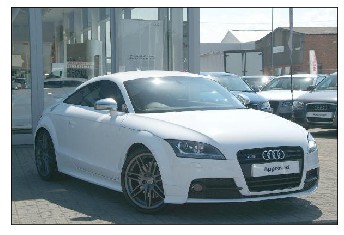

In [46]:
img_path = cars_train_dir/'00001.jpg'
im = plt.imread(str(img_path))
ax = show_img(im)

In [73]:
cars_annos = sio.loadmat(devkit_dir/'cars_train_annos.mat')
cars_meta = sio.loadmat(devkit_dir/'cars_meta.mat')
class_names = dict(zip(range(1, nclasses+1), [c[0] for c in cars_meta['class_names'][0]]))
dataset = [] 
for i, arr in enumerate(cars_annos['annotations'][0]):
  dataset.append([arr[-1][0]] + [ y[0][0] for y in arr ][:-1] )
temp_df = pd.DataFrame(dataset, columns = ['filename', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'ClassID'])
temp_df = temp_df.assign(ClassName = temp_df.ClassID.map(dict(class_names)))
temp_df.head(2)

,filename,bbox_x1,bbox_y1,bbox_x2,bbox_y2,ClassID,ClassName
0,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012
1,00002.jpg,36,116,868,587,3,Acura TL Sedan 2012


In [76]:
def make_dataframe_v2():
    cars_annos = sio.loadmat(devkit_dir/'cars_train_annos.mat')
    cars_meta = sio.loadmat(devkit_dir/'cars_meta.mat') 
    
    nclasses = len(cars_meta["class_names"][0])
    assert nclasses == 196 
    
    class_names = dict(zip(range(1, nclasses+1), [c[0] for c in cars_meta['class_names'][0]]))
    
    dataset = [] 
    for i, arr in enumerate(cars_annos['annotations'][0]):
        dataset.append([arr[-1][0]] + [ y[0][0] for y in arr ][:-1] )
    temp_df = pd.DataFrame(dataset, columns = ['filename', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'ClassID'])
    temp_df = temp_df.assign(ClassName = temp_df.ClassID.map(dict(class_names)))
    return temp_df
    
data_frame = make_dataframe_v2()

In [77]:
data_frame.head(2)

,filename,bbox_x1,bbox_y1,bbox_x2,bbox_y2,ClassID,ClassName
0,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012
1,00002.jpg,36,116,868,587,3,Acura TL Sedan 2012


In [80]:
data_frame.to_csv(devkit_dir/"converted_to_dataframe.csv")

In [81]:
devkit_dir.ls()

[PosixPath('/home/thomassw66/stanford-cars-v2/devkit/cars_test_annos.mat'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/cars_meta.mat'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/converted_to_dataframe'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/cars_train_annos.mat'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/eval_train.m'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/converted_to_dataframe.csv'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/train_perfect_preds.txt'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/README.txt')]

In [83]:
better_data_frame = data_frame.assign(filename = data_frame.filename.map(lambda x: cars_train_dir/x))

In [84]:
data_frame.head()

,filename,bbox_x1,bbox_y1,bbox_x2,bbox_y2,ClassID,ClassName
0,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012
1,00002.jpg,36,116,868,587,3,Acura TL Sedan 2012
2,00003.jpg,85,109,601,381,91,Dodge Dakota Club Cab 2007
3,00004.jpg,621,393,1484,1096,134,Hyundai Sonata Hybrid Sedan 2012
4,00005.jpg,14,36,133,99,106,Ford F-450 Super Duty Crew Cab 2012


In [117]:
SEED = 42
np.random.seed(SEED)

In [146]:
db = ImageDataBunch.from_df(path = cars_train_dir, ds_tfms=get_transforms(), df = data_frame, bs=32, seed=SEED, size=224, fn_col="filename", label_col="ClassName").normalize(imagenet_stats)

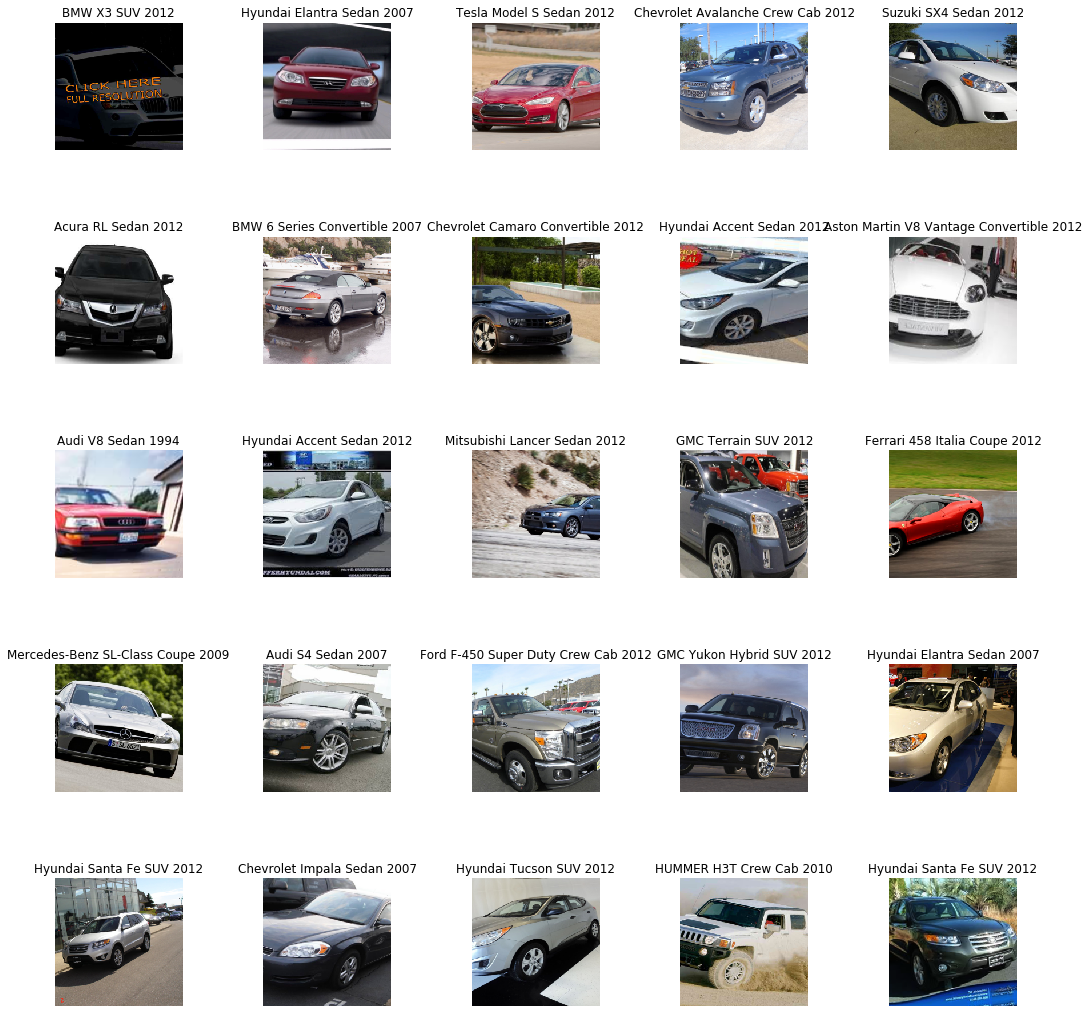

In [147]:
db.show_batch(rows=5, figsize=(15,15))

In [153]:
learn = cnn_learner (db, models.resnet50, metrics=error_rate)

In [154]:
learn.model


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


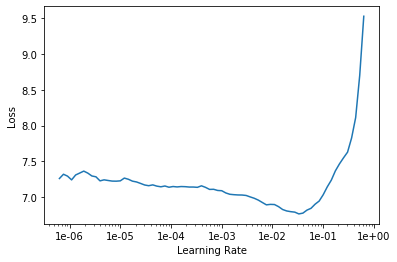

In [155]:
learn.lr_find()
learn.recorder.plot()

In [156]:
learn.fit_one_cycle(14, max_lr=1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,4.804505,3.375115,0.769656,00:54
1,3.578878,3.031972,0.712531,00:54
2,3.645952,3.420250,0.743858,00:53
3,2.969680,2.529831,0.630835,00:54
4,2.646009,2.411226,0.638821,00:53
5,2.370331,2.023710,0.525798,00:54
6,2.018299,1.717165,0.463145,00:54
7,1.654019,1.523421,0.404177,00:54
8,1.323494,1.150903,0.307740,00:54
9,1.105367,0.988362,0.285012,00:54


In [158]:
learn.save('stage-1-resnet50-14-epoch')

In [159]:
# learn.load('stage-1-resnet50-14-epoch')

Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Audi TTS Coupe 2012,Acura TL Sedan 2012,Dodge Dakota Club Cab 2007,Hyundai Sonata Hybrid Sedan 2012,Ford F-450 Super Duty Crew Cab 2012
Path: /home/thomassw66/stanford-cars-v2/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Plymouth Neon Coupe 1999,Honda Odyssey Minivan 2012,Aston Martin Virage Convertible 2012,Fisker Karma Sedan 2012,Audi S6 Sedan 2011
Path: /home/thomassw66/stanford-cars-v2/cars_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_

In [162]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


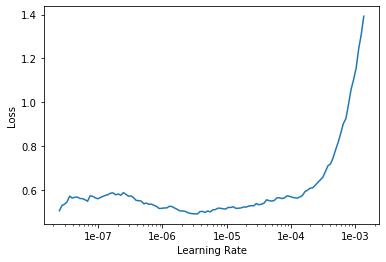

In [163]:
learn.lr_find(start_lr=1e-8, end_lr=9e-1, num_it=200)
learn.recorder.plot()

In [164]:
learn.fit_one_cycle(6, 1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.546760,0.769277,0.214988,00:55
1,0.533860,0.754796,0.213759,00:55
2,0.539955,0.754090,0.212531,00:55
3,0.552404,0.763428,0.210688,00:55
4,0.497024,0.753840,0.211302,00:56
5,0.532847,0.759260,0.207617,00:55


In [165]:
learn.fit_one_cycle(6, 1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.511012,0.752419,0.206388,00:55
1,0.541626,0.740469,0.203931,00:56
2,0.502808,0.730322,0.203317,00:55
3,0.469609,0.711660,0.200246,00:56
4,0.444588,0.703244,0.192875,00:55
5,0.433731,0.700740,0.195946,00:56


In [166]:
learn.fit_one_cycle(6, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.441868,0.704069,0.198403,00:55
1,0.485834,0.700141,0.199017,00:56
2,0.432462,0.687706,0.194103,00:56
3,0.426190,0.678143,0.195332,00:57
4,0.416900,0.677752,0.197789,00:57
5,0.393550,0.678705,0.198403,00:56


In [167]:
learn.save('stage-2-resnet50-28-epoch')

**Interpretation**

I wasn't expecting resnet50 to do nearly this well. 80.18% classification accuracy compare to 84% classification accuracy with the resnet152 architecture [here](https://github.com/morganmcg1/Projects/blob/master/stanford-cars/1_stanford_cars_basic.ipynb)

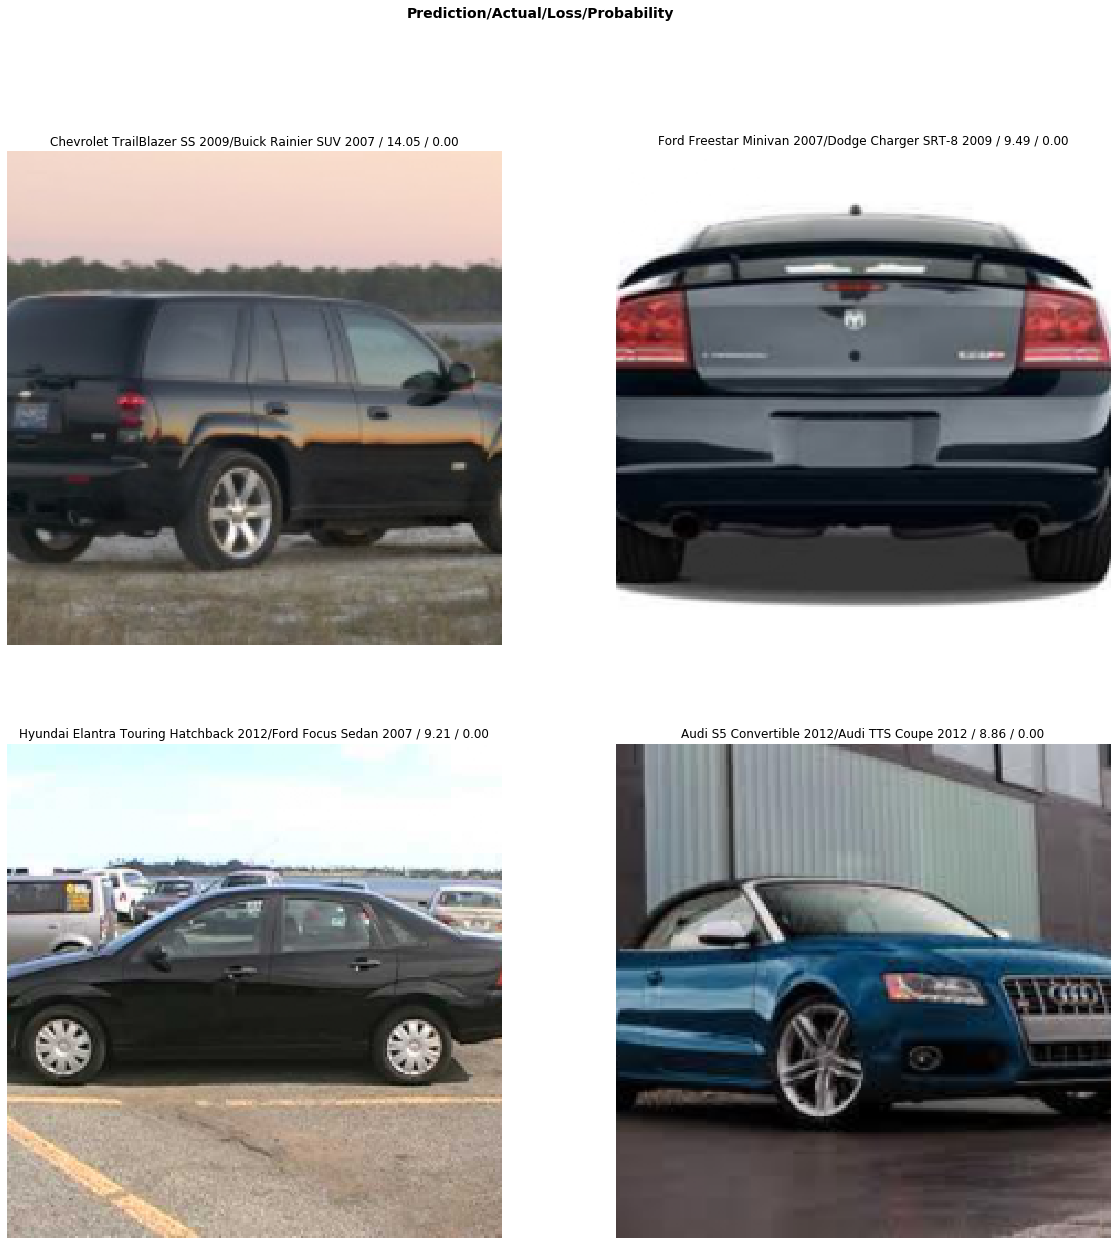

In [172]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, figsize=(20,20))

In [173]:
most_confused = interp.most_confused()
most_confused

[('Bentley Continental GT Coupe 2012', 'Bentley Continental GT Coupe 2007', 6),
 ('Chevrolet Silverado 1500 Extended Cab 2012',
  'Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
  6),
 ('Dodge Caliber Wagon 2007', 'Dodge Caliber Wagon 2012', 6),
 ('Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 5),
 ('Dodge Caliber Wagon 2012', 'Dodge Caliber Wagon 2007', 4),
 ('Audi S5 Coupe 2012', 'Audi A5 Coupe 2012', 3),
 ('Bentley Arnage Sedan 2009', 'Audi V8 Sedan 1994', 3),
 ('Bugatti Veyron 16.4 Coupe 2009', 'Bugatti Veyron 16.4 Convertible 2009', 3),
 ('HUMMER H2 SUT Crew Cab 2009', 'HUMMER H3T Crew Cab 2010', 3),
 ('Honda Accord Sedan 2012', 'Acura RL Sedan 2012', 3),
 ('Spyker C8 Convertible 2009', 'Spyker C8 Coupe 2009', 3),
 ('Aston Martin V8 Vantage Convertible 2012',
  'Aston Martin V8 Vantage Coupe 2012',
  2),
 ('Aston Martin Virage Convertible 2012',
  'Aston Martin V8 Vantage Convertible 2012',
  2),
 ('Audi 100 Sedan 1994', 'Audi V8 Sedan 1994', 2),
 ('Audi 100 Wagon 1994', 'Audi 100